In [1]:
import sys
# Add path of local module to system, ,diachr is located in parent directory 
# compared to this file
sys.path.append("..")
from diachr import BinomialInteractionModel

In [2]:
import os
import matplotlib.pyplot as plt
# This causes figures to be appear in the notebook
%matplotlib inline  

In [3]:
# Adjust path as necessary
# This should be a diachromatic extended interaction file
iefile = '/home/peter/data/diachromatic/JAV_MK_RALT_0.0019_enhanced_interaction_file_with_di_uii_and_uie.tsv.gz'
if not os.path.exists(iefile):
    raise FileNotFoundError("Could not find IE file")

In [4]:
# The constructor has defaults for each argument, change as desired

p_value_cutoff=0.05

bim = BinomialInteractionModel(p_value_cutoff=p_value_cutoff)

[INFO] Looking for smallest number of read pairs n that yields a significant P-value with the given threshold of 0.05.
	[INFO] Smallest n: 5 read pairs (0.03125)
[INFO] Input parameters
	[INFO] --out_prefix: OUTPREFIX
	[INFO] --p-value-cutoff: 0.05


<h2>We generate a plot of simulated data</h2>

In [9]:
n_max=500
i_num=1000000
signum_list, N_SIG_DICT_SIM = bim.count_simulated_interactions(n_max=n_max, i_num=i_num, )

[INFO] Generating random numbers of simple and twisted read pairs ...
[INFO] Counting significant interactions for each n ...


<p>signum_list contains the numbers of interactions that were found to be significant where the interactions contain the number
of read pairs as indicated by the index. We therefore plot the index on the x axis.</p>

In [10]:
idx_list = list(range(0,len(signum_list)))


In [11]:
len(idx_list)
len(N_SIG_DICT_SIM)

496

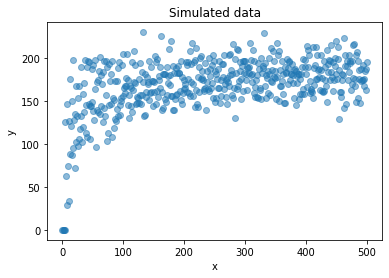

In [12]:
plt.scatter(idx_list, signum_list, alpha=0.5)
plt.title('Simulated data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h2>We generate a plot of empircal data</h2>

In [13]:
n_def_list, n_sig_list = bim.count_significant_empirical_interactions(eifile=iefile)

	[INFO] Processed 1000000 interactions ...
	[INFO] Processed 2000000 interactions ...
	[INFO] Processed 3000000 interactions ...
	[INFO] Processed 4000000 interactions ...
	[INFO] Processed 5000000 interactions ...
... done.
	[INFO] Processed 1000000 interactions ...
	[INFO] Processed 2000000 interactions ...
	[INFO] Processed 3000000 interactions ...
	[INFO] Processed 4000000 interactions ...
	[INFO] Processed 5000000 interactions ...
... done.


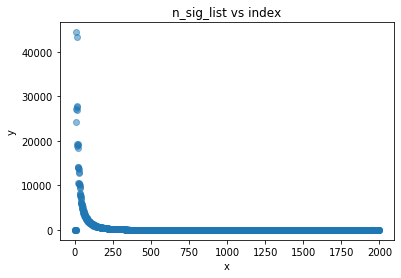

In [18]:
idx_list = list(range(0,len(n_sig_list)))

plt.scatter(idx_list, n_sig_list, alpha=0.5)
plt.title('n_sig_list vs index')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

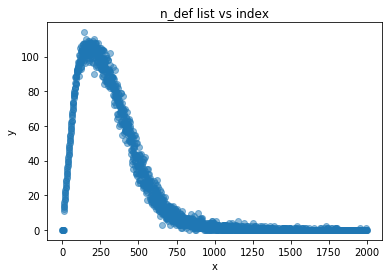

In [19]:
plt.scatter(idx_list, n_def_list, alpha=0.5)
plt.title('n_def list vs index')
plt.xlabel('x')
plt.ylabel('y')
plt.show()